# Лабораторная работа 5. 

# Цветовые модели. Цветовая сегментация
Цель лабораторной работы: научиться применять методы конвертации цветовых моделей и выполнить  цветовую сегментацию выданного изображения.


In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

## 2.4 Цветовые модели

### 2.4.1 Цветовая модель RGB

### 2.4.2 Цветовые модели HSV и HSI

 Цветовая модель HSV (Hue, Saturation, Value - цветовой тон, насыщенность, мера яркости) - модель, ориентированная на человека и обеспечивающая возможность явного задания требуемого оттенка цвета. Среди прочих используемых в настоящее время моделей, эта модель отражает физические свойства цвета и наиболее точно соответствует способу восприятия цвета человеческим глазом.
 Оттенок цвета (H) - это длина световой волны, отраженной или прошедшей через объект. Насыщенность (S) характеризует степень, уровень выражения оттенка цвета. Она определяет соотношение серого цвета и выбранного оттенка и выражается в долях от 0 (серый) до 1 (полностью насыщенный). Мера яркости (V) характеризует интенсивность цвета, поэтому она измеряется в диапазоне от 0 (черный) до 1 (белый). При увеличении яркости цвет становится более светлым (белым). Составляющая V является нелинейной, что близко соответствует восприятию человеком светлых и темных цветов.

<img src="../content/HSV-color-visualization.png" width="300"/>

С точки зрения обработки изображений цветовое пространство удобно тем, что позволяет непосредственно оперировать интенсивностью (яркостью) и цветом (тоном) пикселя.

Существует также цветовая модель HSL (hue, saturation, lightness) или HSI (hue, saturation, intensity) , которая строится по такому же принципу, что и модель HSV, но отличающаяся кодированием цвета пикселя и, соответственно, формулами преобразования из цветового пространства RGB в HSI/HSV и обратно.

**HSV vs. HSL**
Представление **HSL** моделирует то, как различные краски смешиваются вместе, чтобы создать цвет в реальном мире. Полностью насыщенные цвета размещаются вокруг круга при значении светлоты 1/2, при этом значение светлоты 0 или 1 соответствует полностью черному или белому соответственно. Между тем, представление HSV моделирует, как цвета появляются при свете. Разница между HSL и HSV заключается в том, что цвет с максимальной светлотой в HSL является чисто белым, но цвет с максимальным значением / яркостью в HSV аналогичен освещению белого света на цветном объекте (например, яркое белый свет на красный объект заставляет объект по-прежнему казаться красным, просто ярче и интенсивнее, в то время как тусклый свет на красный объект заставляет объект казаться темнее и менее ярким).

Наглядно разницу между HSV и HSL можно увидеть на изображениях визуализации цветовых пространств:

<img src="../content/HSL vs HSV.png" width="600"/>

Подробнее про различия HSL и HSV моделей можно прочитать [здесь](https://en.wikipedia.org/wiki/HSL_and_HSV)

Алгоритмы преобразования из RGB в HSV и наоборот можно посмотреть [здесь](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C))

Алгоритмы преобразования из RGB в HSL и наоборот можно посмотеть [здесь](https://ru.wikipedia.org/wiki/HSL)

**В OpenCV есть готовый метод преобразования изображений из одних цветовых моделей в другие:**
`cv.cvtColor(image, ColorConversionType)`
Где ColorConversionType - тип преобразования из одной цветовой модели в другую:
cv.COLOR_BGR2RGB - преобразование из BGR в RGB
cv.COLOR_RGB2BGR - преобразование из RGB в BGR
cv.COLOR_BGR2GRAY - преобразование из BGR в GRAY
cv.COLOR_RGB2GRAY - преобразование из RGB в GRAY
cv.COLOR_GRAY2RGB - преобразование из GRA в RGB
cv.COLOR_GRAY2BGR - преобразование из GRA в BGR
cv.COLOR_HSV2RGB - преобразование из HSV в RGB
cv.COLOR_HLS2RGB - преобразование из HLS в RGB
cv.COLOR_RGB2HSV - преобразование из RGB в HSV
cv.COLOR_RGB2HLS - преобразование из RGB в HLS

Полный список типов конвертации можно посмотреть в [документации](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

In [2]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


Загружаем изображение. Преобразуем в модель RGB

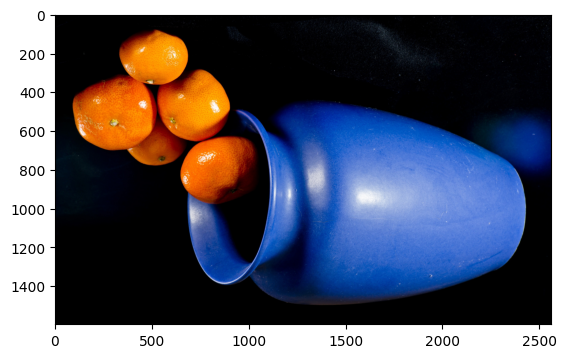

In [3]:
image = cv.imread('../images/lab5-1.jpg')
(h, w, d) = image.shape
angle = -180
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
image = cv.warpAffine(image, M, (w, h))

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Отображаем разные каналы по разным осям на трехмерном графике. В случае модели RGB не видно кластеризации по цвету.

Построим отдельный канал красного цвета

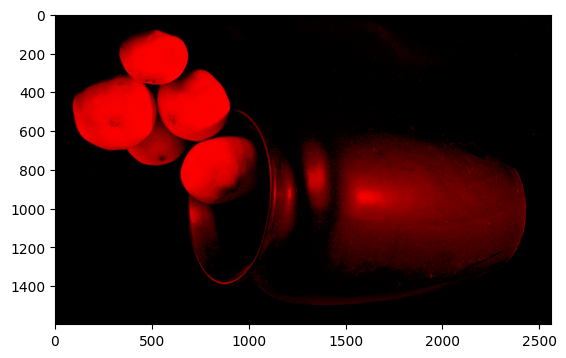

In [4]:
red = image_rgb.copy()
# set blue and green channels to 0
red[:, :, 1] = 0
red[:, :, 2] = 0
# RGB - Red
plt.imshow(red)
plt.show()

Преобразуем изображение в цветовую модель HSV

In [5]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)


Отобразим разные каналы полученного изображения на трехмерном графике

In [6]:
# h, s, v = cv.split(image_hsv)
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# axis.view_init(azim=45) 
# plt.show()

Создадим маски для разных оттенков синего цвета

<Axes: >

<Axes: >

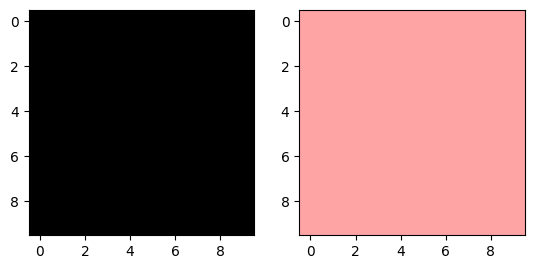

In [7]:
lower_blue = np.array([70,70,0])
upper_blue = np.array([255,90,255])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

Найдем на изображении цвета подходящие под маску от светлосинего до темносинего. И добавим маску на изображение.

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

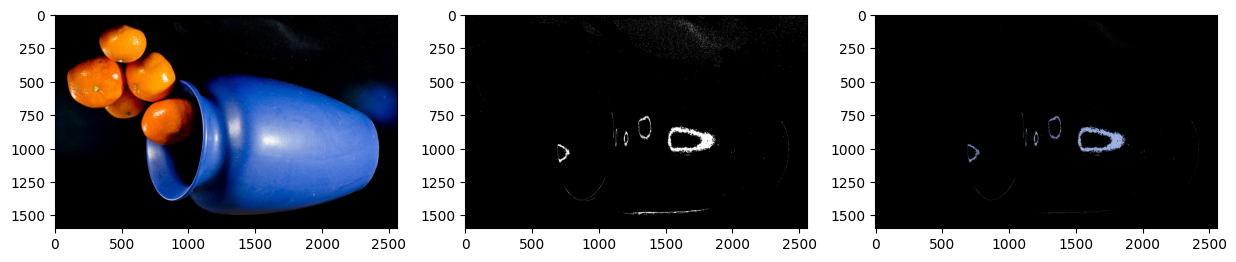

In [8]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

Зададим другую маску

<Axes: >

<Axes: >

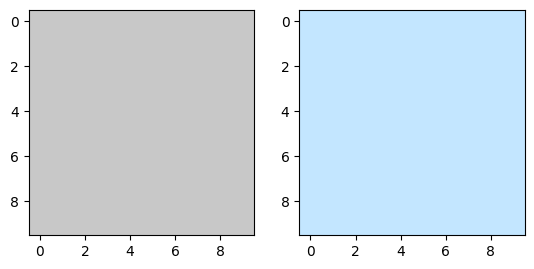

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

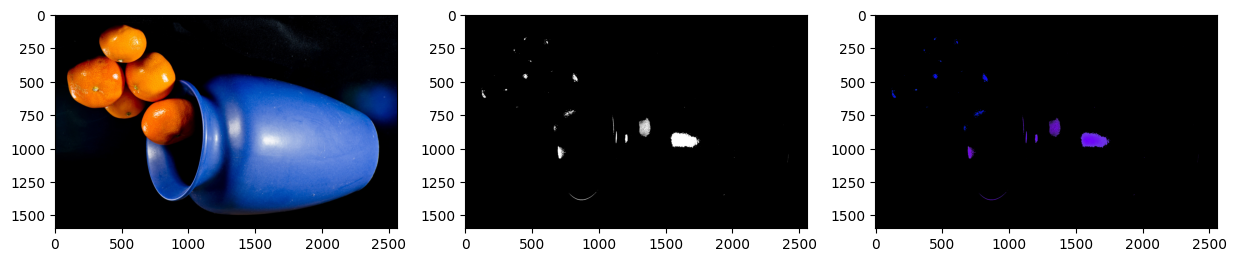

In [9]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

mask_white = cv.inRange(image_hsv, light_white, dark_white)
result_white = cv.bitwise_and(image_hsv, image_hsv, mask=mask_white)
plt.figure(figsize=(15,20))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_white)
plt.show()

Применим обе маски и сгладим изображение

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

<Axes: >

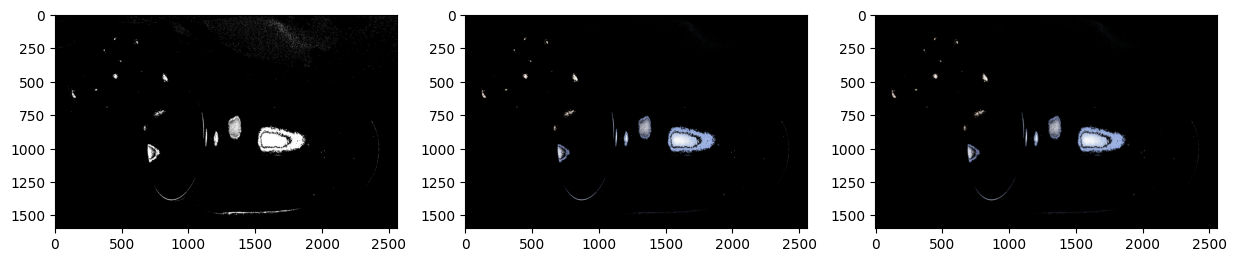

In [10]:
final_mask = mask + mask_white

final_result = cv.bitwise_and(image_rgb, image_rgb, mask=final_mask)
blur = cv.GaussianBlur(final_result, (7, 7), 0)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_result)
plt.subplot(1, 3, 3)
plt.imshow(blur)
plt.show()

Пробуем сделать цветовую сегментацию

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

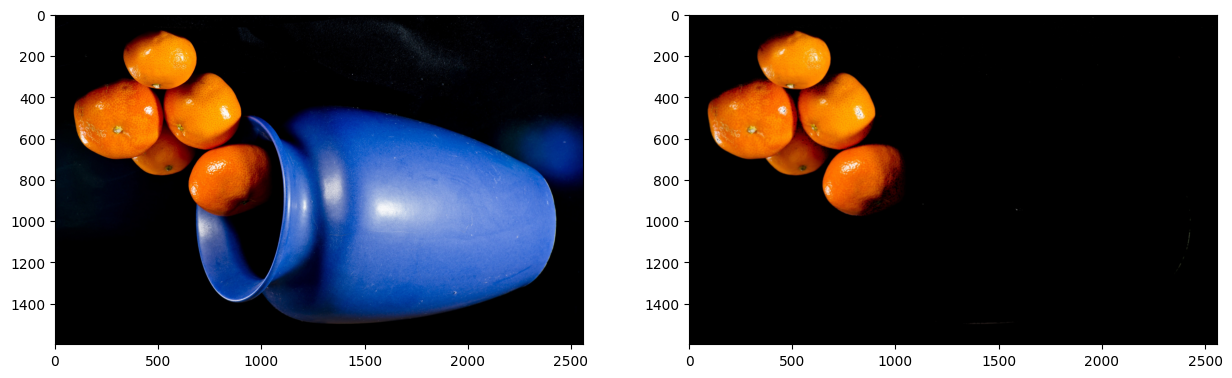

In [11]:
def segment_image(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = (0, 0, 0)
    upper_blue = (255, 255, 0)

    # Apply the blue mask 
    mask = cv.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
    light_white = (0, 0, 0)
    dark_white = (50, 255, 255)

    # Apply the white mask
    mask_white = cv.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv.GaussianBlur(result, (7, 7), 0)
    return blur


result = segment_image(image_rgb)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Самостоятельное задание. Сделать цветовую сегментацию выданного изображения. 
Пороги для цветовой сегментации подобрать в ручную, используя преобразование изображения 
в формат LAB.

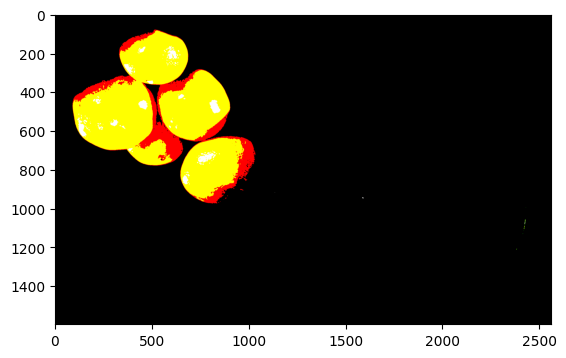

In [12]:
ret, threshold_image = cv.threshold(result, 50, 255, cv.THRESH_BINARY)
plt.imshow(threshold_image)

In [13]:
count = np.count_nonzero(threshold_image == 255)
count

821661

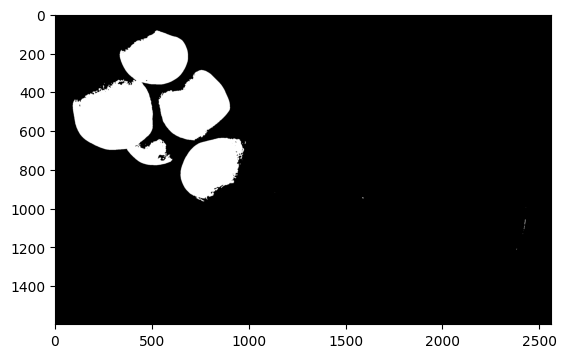

In [14]:
red = threshold_image.copy()
# set blue and green channels to 0
red[:, :, 0] = 0
red[:, :, 2] = 0


# Получение массива булевых значений для зеленого цвета
green_mask = (threshold_image[:, :, 1] != 0)

# Установка всех зеленых пикселей в белый цвет [255, 255, 255]
threshold_image[green_mask] = [255, 255, 255]

# Установка всех остальных пикселей в черный цвет [0, 0, 0]
threshold_image[np.logical_not(green_mask)] = [0, 0, 0]

# # Получение массива булевых значений, показывающих, где зеленый цвет ненулевой
# green_not_zero = red[:, :, 1] != 0

# # Установка всех цветов в белый, кроме зеленого
# red[np.logical_not(green_not_zero)] = [255, 255, 255]

# RGB - Red
plt.imshow(threshold_image)
plt.show()

3
5


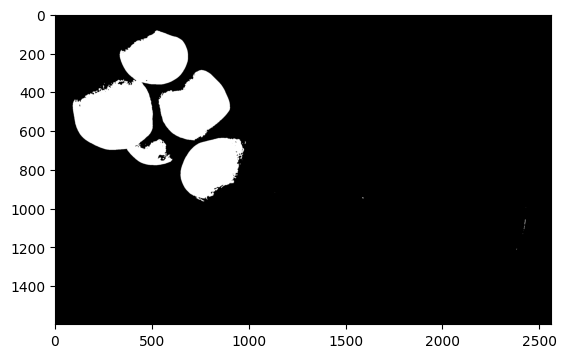

In [15]:
# Преобразование изображения в оттенки серого
gray = cv.cvtColor(threshold_image, cv.COLOR_RGB2GRAY)
plt.imshow(threshold_image)
gray2 = gray.copy()
# Применение порогового значения для выделения белых шаров
_, thresholded = cv.threshold(gray, 200, 255, cv.THRESH_BINARY)

# Обнаружение контуров на пороговом изображении
contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
count = 0
for contour in contours:
    # Оцените площадь контура
    area = cv.contourArea(contour)

    # Оцените длину контура
    perimeter = cv.arcLength(contour, True)

    #  аппроксимацию контура
    epsilon = 0.01 * perimeter
    approx = cv.approxPolyDP(contour, epsilon, True)

    if len(approx) > 7 and area > 50:
        count += 1
        

print(count)
count=0

for cnt in contours:
    if len(cnt)>16:
        ellipse = cv.fitEllipse(cnt)
        # cv.ellipse(gray2,ellipse,(0,0,255),2)
        count+=1
print(count)

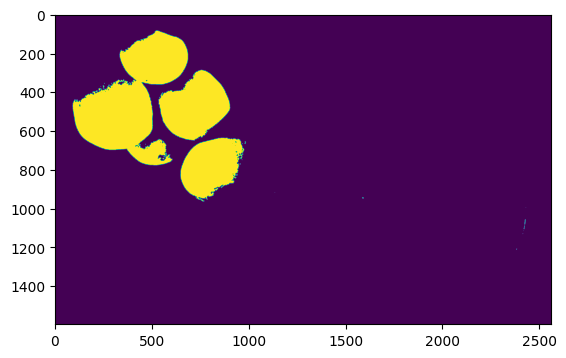

In [16]:
plt.imshow(gray)

In [17]:
# Примените пороговую обработку для выделения зеленой области
_, threshold_image2 = cv.threshold(threshold_image, 0, 255, cv.THRESH_BINARY)

# Найдите контуры на пороговом изображении
contours, hierarchy = cv.findContours(threshold_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Подсчитайте количество шаров
count = 0

for contour in contours:
    # Оцените площадь контура
    area = cv.contourArea(contour)

    # Оцените длину контура
    perimeter = cv.arcLength(contour, True)

    # Определите аппроксимацию контура
    epsilon = 0.01 * perimeter
    approx = cv.approxPolyDP(contour, epsilon, True)

    # Проверьте, является ли контур круглым и имеет достаточную площадь
    if len(approx) > 7 and area > 100:
        count += 1

# Выведите результат
print("Количество шаров:", count)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
hsv_min = np.array((0, 105, 105), np.uint8)
hsv_max = np.array((255, 255, 255), np.uint8)

# # hsv = threshold_image

hsv = cv.cvtColor( threshold_image, cv.COLOR_BGR2HSV )
thresh = cv.inRange( hsv, hsv_min, hsv_max )
# threshold_image
contour_image = thresh.copy()
contours0, hierarchy = cv.findContours(contour_image, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours0:
    if len(cnt)>4:
        ellipse = cv.fitEllipse(cnt)
        cv.ellipse(contour_image,ellipse,(0,0,255),2)

cv.imshow(contour_image)
    
# thresh = cv.inRange( hsv, hsv_min, hsv_max )
# thresh = threshold_image
# contours0, hierarchy = cv.findContours(result.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# contour_image = thresh.copy()
# count1=0
# for cnt in contours0:
#     if len(cnt)>10:
#         ellipse = cv.fitEllipse(cnt)
        
#         plt.imshow(ellipse)
#         count+=1
#         cv.ellipse(ellipse ,ellipse,(0,0,255),2)
# # plt.imshow(contour_image)
# plt.show()
# print(count)
# cv.imshow('contours', img)

### Еще пример цветовой сегментации

Известно, что цветные цифровые изображения представляют собой совокупность трех цветовых плоскостей, каждая из которых характеризует одну независимую составляющую цвета, представленную в том же формате, что и обычное 8-битное полутоновое изображение. Следовательно, все описанные процедуры обработки полутоновых изображений в яркостной области могут быть обобщены и на случай обработки цветных изображений. Специфика же здесь связана прежде всего с различными цветовыми моделями, позволяющими по-разному работать с разными цветовыми и другими составляющими изображения.


In [ ]:
image3 = cv.imread('../images/winter_cat.png')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 75
high_h = 85

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()